In [33]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py



load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise


# Design the hyperparameter on example

In [28]:
'#'!=None

True

<feature_extractor_type.WELECHPSD>[{'window': 'hamming', 'nfft': 1024, 'nperseg': 512, 'scaleing': 'spectrum', 'multichannel': 'concat', 'channel': 'all'}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000004.wav


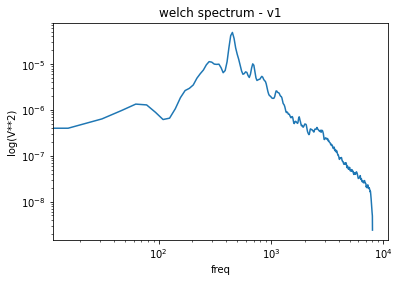

In [34]:
file_path = r'\dataset\6dB\pump\id_00\abnormal\00000004.wav'
fe_psd = feature_extractor_welchPSD(BASE_FOLDER,'v1')
fe_psd.set_hyperparamter(nperseg=512, nfft=1024, channel='all', multichannel='concat')
fe_psd.create_from_wav(file_path)
fe_psd.plot()
fe_psd.flat_feature().shape
print(fe_psd)

# check run

In [32]:
%run -i ..\..\utility\CleanAextract_to_PandasPickles.py
CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= r'\dataset\PSD_to_Pandas\data2',
                                   FileFindDict = {'SNR': '6dB',
                                                  'machine': 'pump', 
                                                  'ID': ['00']},
                                   FileCountLimit = 5,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   ).head()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


UnboundLocalError: local variable 'fe' referenced before assignment

## reload test

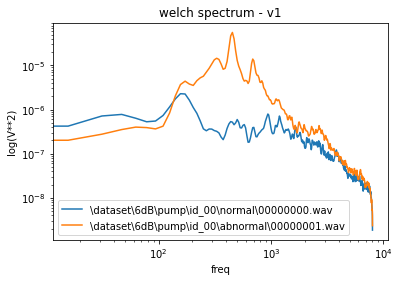

In [6]:
df = pd.read_pickle(r'.\data\FEpandas_welchPSDv1_seg512_ch0.pkl')

fe1 = feature_extractor_from_file(BASE_FOLDER + df.welchPSDv1_seg512_ch0.loc[0],
                                 BASE_FOLDER)

fe2 = feature_extractor_from_file(BASE_FOLDER + df.welchPSDv1_seg512_ch0.loc[6],
                                 BASE_FOLDER)

fe1.plot()
fe2.plot()
plt.legend()

# batch creation

In [9]:
TF = r'\dataset\PSD_to_Pandas\data'
def process_set(FileFindDict):
    df = CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= TF,
                                   FileFindDict = FileFindDict,
                                   FileCountLimit = None,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   )
    


process_set({'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}) # 15:12 min - > 33MB
#process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'fan','ID': ['00','02','04','06']})



100%|██████████████████████████████████████████████████████████████████████████████| 4205/4205 [15:12<00:00,  4.61it/s]


## With noise kill

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise


'denoised'

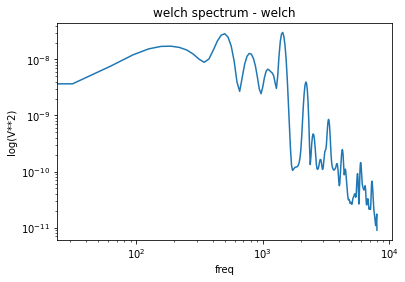

'original'

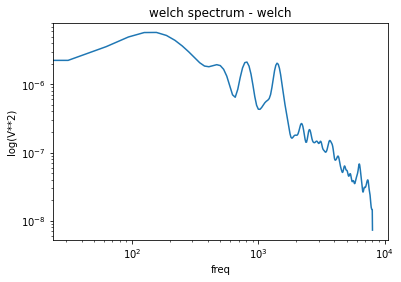

<feature_extractor_type.BASE>[{'aggregation': <function mean at 0x000002453C827A68>, 'nfft': 2048}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000012.wav
<feature_extractor_type.WELECHPSD>[{'window': 'hamming', 'nfft': 1024, 'nperseg': 512, 'scaleing': 'spectrum', 'multichannel': 'concat', 'channel': 'all'}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000004.wav


In [35]:
# nnFilt design
from IPython.display import display, Audio
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
#-- test
file_path = r'\dataset\6dB\pump\id_02\normal\00000012.wav'
nnF = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER)
nnF.set_hyperparamter(aggregation=np.mean)
nnF.create_from_wav(file_path)
wmf = nnF.get_wav_memory_file()
display('denoised')
display(Audio(data=wmf.channel[0],rate=wmf.srate))
psd = feature_extractor_welchPSD(BASE_FOLDER)
psd.create_from_wav(wmf)
psd.plot()
plt.show()
af = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
display('original')
display(Audio(data=af[0][0],rate=wmf.srate))
psd.create_from_wav(file_path)
psd.plot()
plt.show()
print(nnF)
print(fe_psd)

In [12]:
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\CleanAextract_to_PandasPickles.py
from time import time
#denoise
nnF = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER,'mean')
nnF.set_hyperparamter(aggregation=np.mean, channel=0)

#psd
fe_psd = feature_extractor_welchPSD(BASE_FOLDER,'v1')
fe_psd.set_hyperparamter(nperseg=512, nfft=1024, channel=0, multichannel='concat')


TF = r'\dataset\PSD_to_Pandas\preNNfilt_data_n'
def process_set(FileFindDict):
    df = CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= TF,
                                   FileFindDict = FileFindDict,
                                   FileCountLimit = 8,
                                   CleanerObj = nnF,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   )
    

ts = time()
print(ts)
process_set({'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}) # 3:40:00  - > 33MB
#process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'fan','ID': ['00','02','04','06']})
print(time()-ts)


  0%|                                                                                           | 0/64 [00:00<?, ?it/s]

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
1588085066.3660896


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:35<00:00,  1.81it/s]

35.49517607688904


# Parallel check

In [34]:
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\CleanAextract_to_PandasPickles_parallel.py
from time import time
#denoise
nnF = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER,'mean')
nnF.set_hyperparamter(aggregation=np.mean, channel=0)

#psd
fe_psd = feature_extractor_welchPSD(BASE_FOLDER,'v1')
fe_psd.set_hyperparamter(nperseg=512, nfft=1024, channel=0, multichannel='concat')


TF = r'\dataset\PSD_to_Pandas\preNNfilt_data_p'
def process_set(FileFindDict):
    df = CleanAextract_to_PandasPickles_p(base_folder=BASE_FOLDER,
                                   target_folder= TF,
                                   FileFindDict = FileFindDict,
                                   FileCountLimit =20,
                                   CleanerObj = nnF,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   )
    

ts = time()
print(ts)
process_set({'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}) #  - > 33MB
#process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'fan','ID': ['00','02','04','06']})
print(time()-ts)

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
1588099869.7308


done
56.05124235153198


In [6]:
152/192

0.7916666666666666

In [9]:
140/190 # all channel improvment

0.7368421052631579

In [14]:
22/35

0.6285714285714286

In [16]:
22/190*3.5

0.4052631578947368

In [17]:
22/140

0.15714285714285714

In [18]:
1/8

0.125